In [11]:
import pandas as pd
from plotting import plot
from time_mean import mean_in_time
from pandas.plotting import register_matplotlib_converters
import numpy as np
from app_mask import apply_mask
from cross_corr import crosscorr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 
import seaborn as sns
import matplotlib.dates as mdates
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 8)})

In [12]:
inflation= pd.read_csv('data/inflation.csv', sep=",")
inflation_since_2003=apply_mask(inflation,'2003-01-31','2019-12-30')
monetary_base= pd.read_csv('data/monetary_base.csv', sep=",",thousands='.',dtype={'Monetary Base':np.int32})
monetary_base_monthly_mean=mean_in_time(monetary_base,"1M")

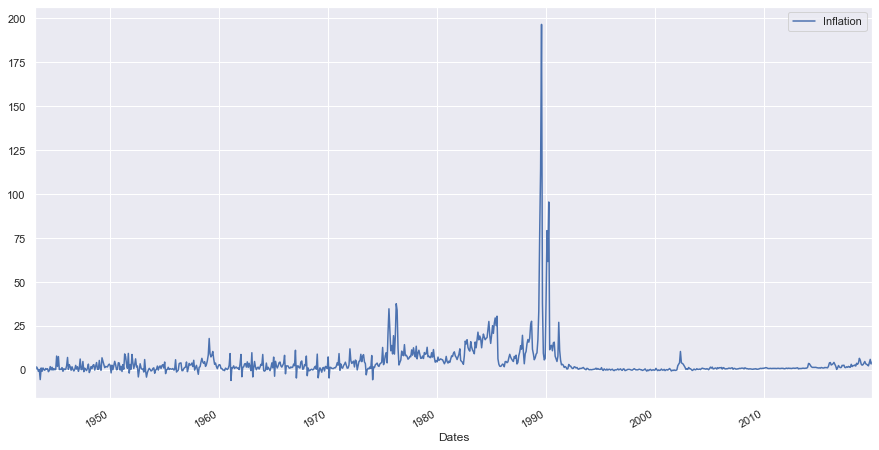

In [13]:
inflation.set_index('Dates', inplace=True)
inflation.plot()

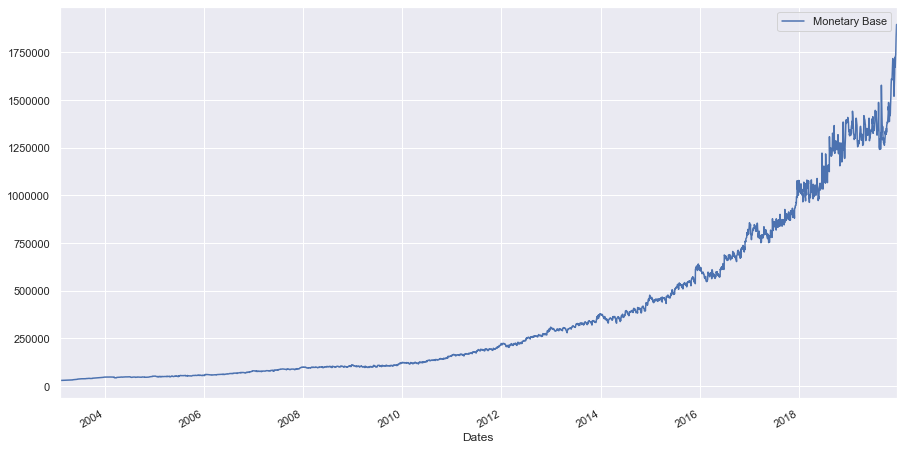

In [14]:
monetary_base.set_index('Dates', inplace=True)
monetary_base.plot()

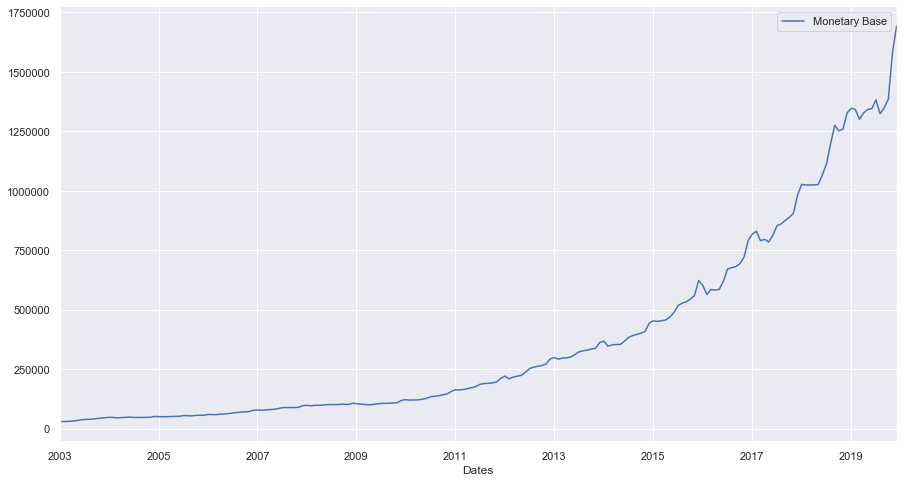

In [15]:
monetary_base_monthly_mean.set_index('Dates', inplace=True)
monetary_base_monthly_mean.plot()

In [16]:
change_monetary_base_monthly_mean=monetary_base_monthly_mean.copy()
change_monetary_base_monthly_mean["Monetary Base"]=change_monetary_base_monthly_mean["Monetary Base"].pct_change()
change_monetary_base_monthly_mean=change_monetary_base_monthly_mean.rename(columns={"Monetary Base":"Change Monetary Base"})
change_monetary_base_monthly_mean=change_monetary_base_monthly_mean[change_monetary_base_monthly_mean.index>'2003-02-01']


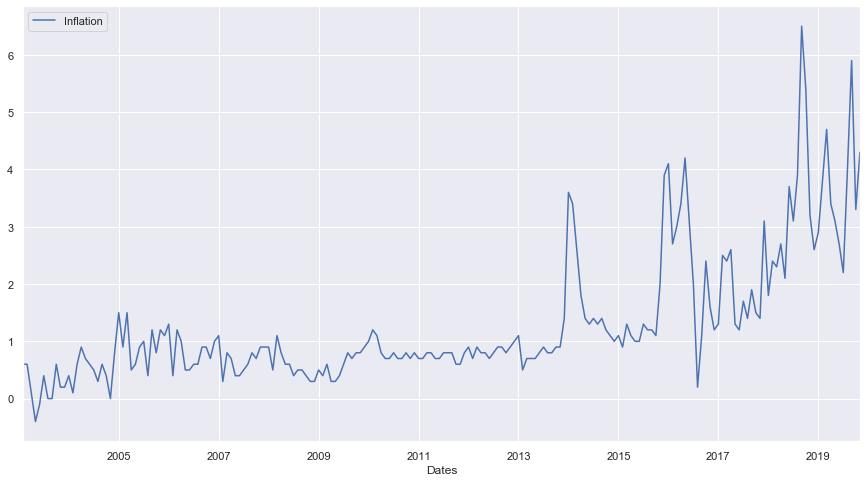

In [17]:
inflation_since_2003.set_index('Dates', inplace=True)
inflation_since_2003.plot()

Pearson Coefficient

In [18]:
pearsonr(change_monetary_base_monthly_mean['Change Monetary Base'].values[:-1],inflation_since_2003['Inflation'])

(0.01805413719279396, 0.7987030993345862)

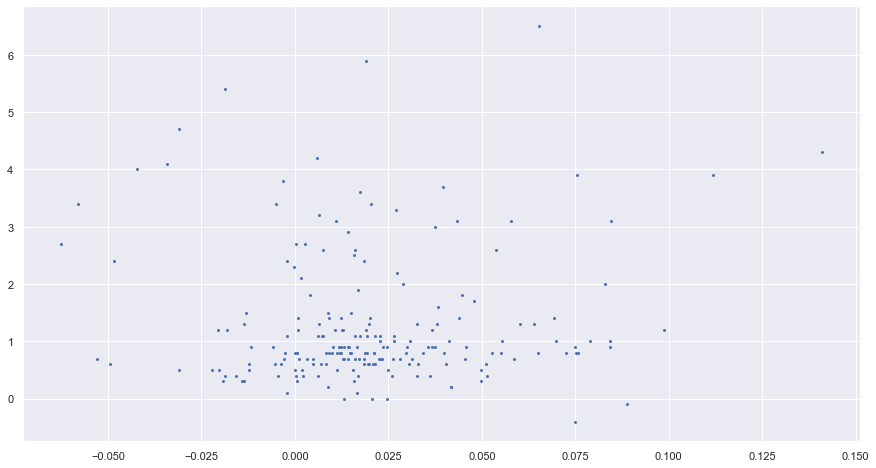

In [19]:
plt.plot(change_monetary_base_monthly_mean['Change Monetary Base'].values[:-1],inflation_since_2003['Inflation'].values,'o',markersize=2)


Pearson with window

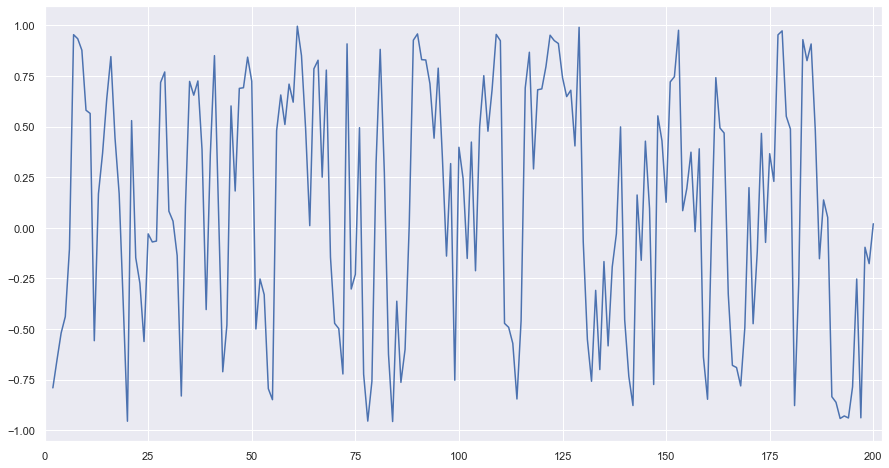

In [33]:
window=4 #in months
change_monetary_base_values=change_monetary_base_monthly_mean['Change Monetary Base'].reset_index().drop(['Dates'],axis=1)
inflation_values=inflation_since_2003['Inflation'].reset_index().drop(['Dates'],axis=1)
rolling_r=change_monetary_base_values['Change Monetary Base'].rolling(window=window,center=True).corr(inflation_values['Inflation'])
rolling_r.plot()

shifted pearson

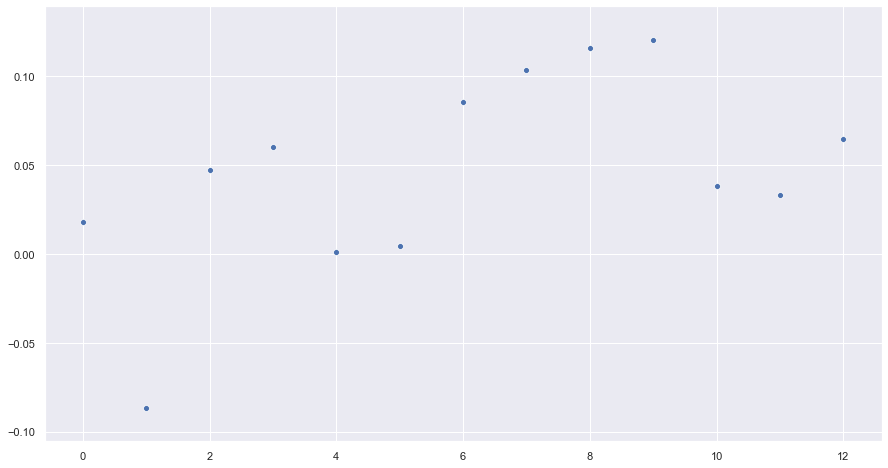

In [36]:
rs = [crosscorr(change_monetary_base_values,inflation_values, lag) for lag in np.arange(0,13,1)]
sns.scatterplot(np.arange(0,13,1),rs)

Analysing the pearson index with a lag, the highest value is obtained with a lag of 10 months

Rolling window time lagged cross correlation

In [37]:
what happens when the inflation is high?

Object `high` not found.


In [ ]:
what happens when the inflation is high

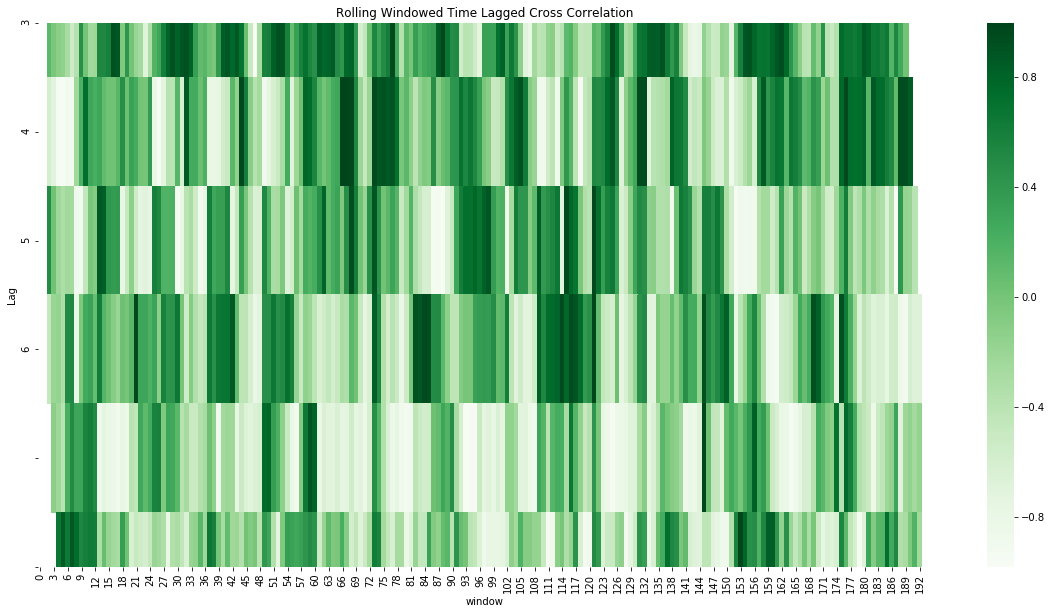

In [53]:
window_size = 5 #months

rss=pd.DataFrame(d1['ChangeMonetary Base'].rolling(window=window_size,center=True).corr(d2['Inflation'].shift(lag)) for lag in np.arange(-3,3,1))

f,ax = plt.subplots(figsize=(20,10))

sns.heatmap(rss,cmap='Greens',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation', xlabel='window',ylabel='Lag')
#ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_yticklabels([3, 4, 5, 6]);
myFmt = mdates.DateFormatter('%d')
plt.show()